In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import linecache

## 物理定数 [cgs unit]
pi           = np.pi                    # PI
k_b          = 1.38064852e-16           # Boltzmann constant in erg/K
m_p          = 1.672621924e-24          # proton mass in g
Grav         = 6.67408e-08              # gravitational constant in cm^3 g^-1 s^-2
AU           = 1.495979e+13             # astronomical unit in cm
yr           = 3.1556925e7              # year in s
mu           = 2.34e0                   # mean molecular mass in proton masses
M_sun        = 1.9884e33                # mass of the sun in g
R_sun        = 6.955080e10              # radius of the sun in cm
L_sun        = 3.828e33                 # luminosity of the sun
sigmaSB      = 5.6705e-5                # stefan-boltzmann constant

In [2]:
## data ID
ID_RADIUS = 0   # radius [cm]
ID_SIGMAG = 1   # gas surface density [g cm^-2]
ID_TEMP   = 2   # temperature [K]
ID_CS     = 3   # sound speed [cm s^-1]
ID_OMEGA  = 4   # angular velocity [s^-1]
ID_HG     = 5   # gas scale height [cm]
ID_QT     = 6   # Toomre's Q parameter
ID_MR     = 7   # enclosed mass [g]
ID_ALPHA  = 8   # alpha parameter
ID_VGR    = 9   # gas radial velocity [cm s^-1]
ID_VGRVIS = 10  # viscous velocity [cm s^-1]
ID_VGRETA = 11  # gas pressure gradient velocity [cm s^-1]
ID_VGRSRC = 12  # velocty by source term [cm s^-1]
ID_CVGVIS = 13  # gas viscous velocity coefficient by gas and dust interaction
ID_CVGETA = 14  # gas pressure gradient velocity coefficient by gas and dust interaction
ID_SGINF  = 15  # infall rate per area [g cm^-2 s^-1]
ID_SGWIND = 16  # wind rate per area [g cm^-2 s^-1]
ID_SIGMAD = 17  # dust surface density [g cm^-2]
ID_MD     = 18  # dust mass [g]
ID_AD     = 19  # dust size [cm]
ID_ST     = 20  # Stokes number
ID_HD     = 21  # dust scale height [cm]
ID_VDR    = 22  # dust radial velocity [cm s^-1]
ID_CVDVIS = 23  # dust viscous velocity coefficient by gas and dust interaction
ID_CVDETA = 24  # gas pressure gradient velocity coefficient by gas and dust interaction
ID_MAX    = 25  # number of data ID

def read_input(filename):
    file = open(filename, 'r', encoding='UTF-8')
    d = file.readlines()
    nlen = len(d)
    input_prams = {}
    for i in range(nlen):
        line = d[i].split()
        if len(line) == 0:
            continue
        if (line[0] == '\n') or (line[0] == '#'):
            continue
        input_prams[line[0]] = line[2]
    return input_prams
        

def read_data(filename, nr):
    with open(filename) as f:
        data = np.fromfile(f, dtype=float)
        time = data[0]
        data = data[11:].reshape([ID_MAX, nr])
    return time, data

def read_grid(filename):
    rcen = np.array([float(i) for i in linecache.getline(filename, 2).split()])
    rbnd = np.array([float(i) for i in linecache.getline(filename, 3).split()])
    rvol = np.array([float(i) for i in linecache.getline(filename, 4).split()])
    linecache.clearcache()
    return rcen, rbnd, rvol

In [4]:
dir_name = "../output/dustgrowth/"
inputfile = dir_name + "input"

input_params = read_input(inputfile)
nr = int(input_params['nr'])

logfile = dir_name + "log"

# plot_time = [2.7e5, 6.0e5, 7.7e5, 1.27e6]
plot_time = [2.0e5, 2.3e5, 2.6e5, 2.9e5]
# plot_time = [2.7e5, 6.0e5, 7.7e5, 1.27e6]
plot_count = []

log_data = np.loadtxt(logfile, dtype=float).T
count = log_data[0]
time  = log_data[1]
ndata = len(count)
time_index = 0
for i in range(ndata):
    if plot_time[time_index] <= (time[i]/yr):
        plot_count.append(int(count[i]))
        time_index += 1
        if (time_index == len(plot_time)):
            break
            
print(plot_count)

[11, 14, 17, 20]


In [5]:
gridfile = dir_name + "grid"
rcen, rbnd , rvol = read_grid(gridfile)

In [6]:
file1 = dir_name + "disk" + str(plot_count[0])
file2 = dir_name + "disk" + str(plot_count[1])
file3 = dir_name + "disk" + str(plot_count[2])
file4 = dir_name + "disk" + str(plot_count[3])

time1, data1 = read_data(file1, nr)
time1 = "{:.1e}".format(time1/yr) + "year"
print(time1)

time2, data2 = read_data(file2, nr)
time2 = "{:.1e}".format(time2/yr) + "year"

time3, data3 = read_data(file3, nr)
time3 = "{:.1e}".format(time3/yr) + "year"

time4, data4 = read_data(file4, nr)
time4 = "{:.1e}".format(time4/yr) + "year"

2.0e+05year


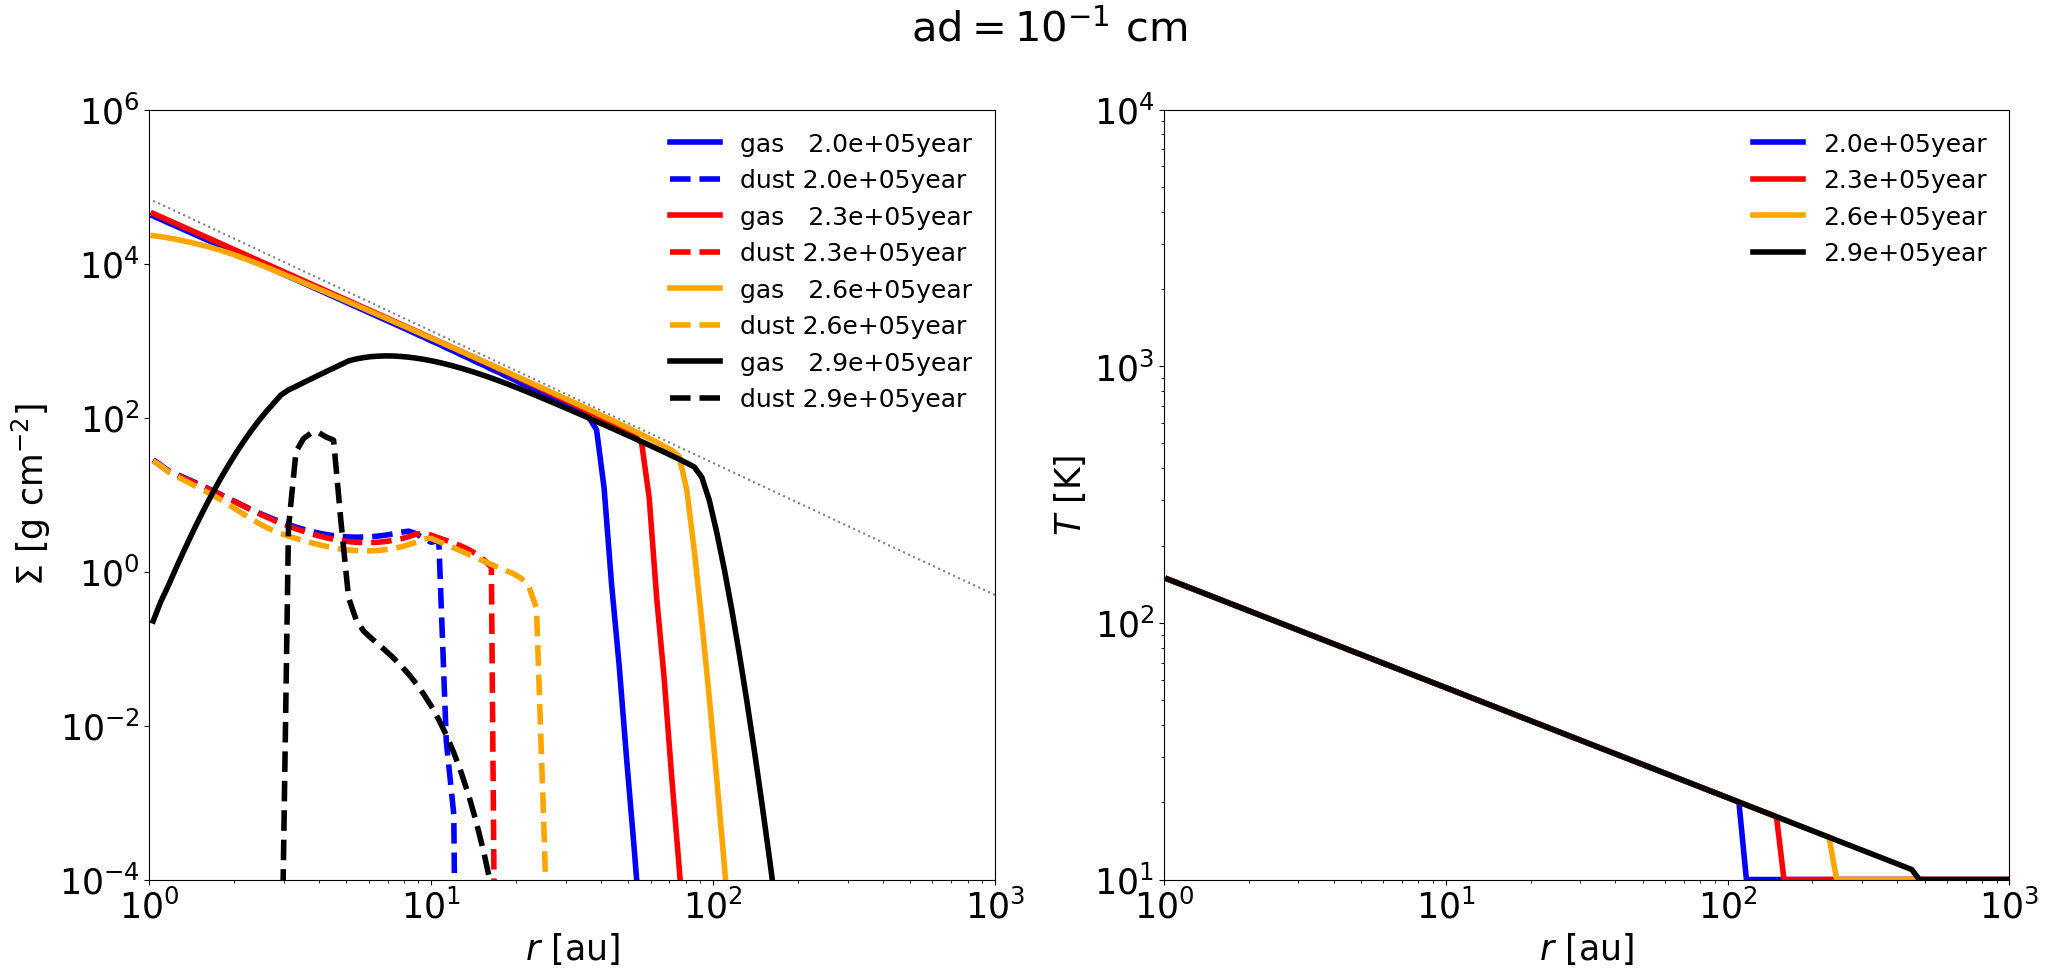

In [7]:
x = data1[ID_RADIUS] / AU

fontsize = 25

fig = plt.figure(figsize=(24, 10))
fig.suptitle(r"$\mathrm{ad} = 10^{-1} \ \mathrm{cm}$", fontsize=30)

ax1 = fig.add_subplot(1, 2, 1)
SQ = 6.9e4 * x**(-12/7)
lw = 4
ax1.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax1.set_ylabel(r"$\Sigma \ [\mathrm{g \ cm^{-2}}]$", fontsize=fontsize)
ax1.plot(x, data1[ID_SIGMAG], label="gas   "+time1, color="blue", lw=lw)
ax1.plot(x, data1[ID_SIGMAD], linestyle="dashed", label="dust "+time1, color="blue", lw=lw)

ax1.plot(x, data2[ID_SIGMAG], label="gas   "+time2, color="red", lw=lw)
ax1.plot(x, data2[ID_SIGMAD], linestyle="dashed", label="dust "+time2, color="red", lw=lw)

ax1.plot(x, data3[ID_SIGMAG], label="gas   "+time3, color="orange", lw=lw)
ax1.plot(x, data3[ID_SIGMAD], linestyle="dashed", label="dust "+time3, color="orange", lw=lw)

ax1.plot(x, data4[ID_SIGMAG], label="gas   "+time4, color="black", lw=lw)
ax1.plot(x, data4[ID_SIGMAD], linestyle="dashed", label="dust "+time4, color="black", lw=lw)

ax1.plot(x, SQ, linestyle="dotted", color="gray")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim(1.0e-4, 1.0e6)
ax1.set_xlim(1.0e0, 1.0e3)
ax1.tick_params(labelsize=fontsize)
ax1.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax2.set_ylabel(r"$T \ [\mathrm{K}]$", fontsize=fontsize)
ax2.plot(x, data1[ID_TEMP], label=time1, color="blue", lw=lw)
ax2.plot(x, data2[ID_TEMP], label=time2, color="red", lw=lw)
ax2.plot(x, data3[ID_TEMP], label=time3, color="orange", lw=lw)
ax2.plot(x, data4[ID_TEMP], label=time4, color="black", lw=lw)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(1.0e1, 1.0e4)
ax2.set_xlim(1.0e0, 1.0e3)
ax2.tick_params(labelsize=fontsize)
ax2.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

plt.show()

/tmp/ipykernel_554298/1469949624.py:2: RuntimeWarning: invalid value encountered in divide
  R1 = np.where(data1[ID_SIGMAG] > 1e-15, data1[ID_SIGMAD]/ data1[ID_SIGMAG], np.nan)
/tmp/ipykernel_554298/1469949624.py:3: RuntimeWarning: invalid value encountered in divide
  R2 = np.where(data2[ID_SIGMAG] > 1e-15, data2[ID_SIGMAD]/ data2[ID_SIGMAG], np.nan)
/tmp/ipykernel_554298/1469949624.py:4: RuntimeWarning: invalid value encountered in divide
  R3 = np.where(data3[ID_SIGMAG] > 1e-15, data3[ID_SIGMAD]/ data3[ID_SIGMAG], np.nan)
/tmp/ipykernel_554298/1469949624.py:5: RuntimeWarning: invalid value encountered in divide
  R4 = np.where(data4[ID_SIGMAG] > 1e-15, data4[ID_SIGMAD]/ data4[ID_SIGMAG], np.nan)
/tmp/ipykernel_554298/1469949624.py:9: RuntimeWarning: divide by zero encountered in divide
  R1mid = np.where(data1[ID_ALPHA] > 0.0, np.sqrt((data1[ID_ALPHA] + St)/data1[ID_ALPHA]), np.nan) * R1
/tmp/ipykernel_554298/1469949624.py:10: RuntimeWarning: divide by zero encountered in divide
  R

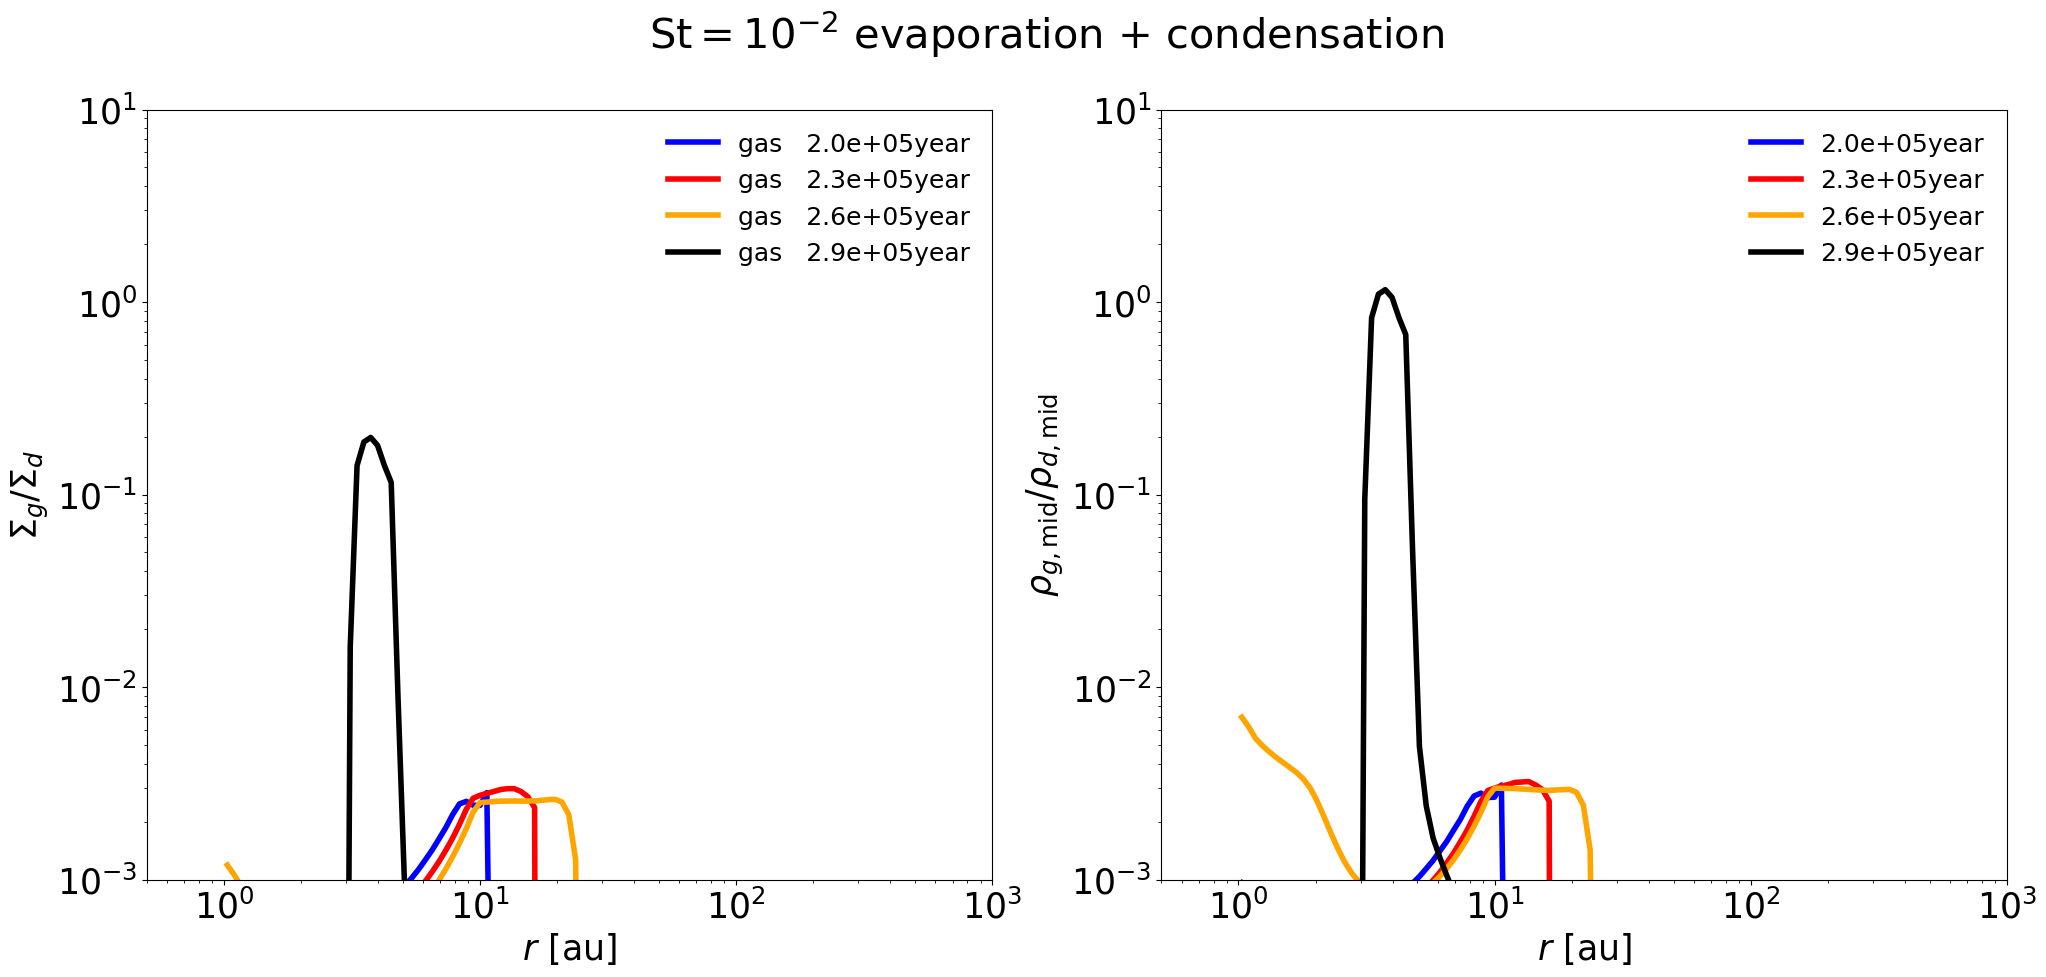

In [19]:
# ガスとダストの質量比
R1 = np.where(data1[ID_SIGMAG] > 1e-15, data1[ID_SIGMAD]/ data1[ID_SIGMAG], np.nan)
R2 = np.where(data2[ID_SIGMAG] > 1e-15, data2[ID_SIGMAD]/ data2[ID_SIGMAG], np.nan)
R3 = np.where(data3[ID_SIGMAG] > 1e-15, data3[ID_SIGMAD]/ data3[ID_SIGMAG], np.nan)
R4 = np.where(data4[ID_SIGMAG] > 1e-15, data4[ID_SIGMAD]/ data4[ID_SIGMAG], np.nan)

St = 1e-2
# midplaneでの質量比 Kanagawa et al. 2017 eq(36)
R1mid = np.where(data1[ID_ALPHA] > 0.0, np.sqrt((data1[ID_ALPHA] + St)/data1[ID_ALPHA]), np.nan) * R1
R2mid = np.where(data2[ID_ALPHA] > 0.0, np.sqrt((data2[ID_ALPHA] + St)/data2[ID_ALPHA]), np.nan) * R2
R3mid = np.where(data3[ID_ALPHA] > 0.0, np.sqrt((data3[ID_ALPHA] + St)/data3[ID_ALPHA]), np.nan) * R3
R4mid = np.where(data4[ID_ALPHA] > 0.0, np.sqrt((data4[ID_ALPHA] + St)/data4[ID_ALPHA]), np.nan) * R4

x = data1[ID_RADIUS] / AU

fontsize = 25

fig = plt.figure(figsize=(24, 10))
fig.suptitle(r"$\mathrm{St} = 10^{-2}$ evaporation + condensation", fontsize=30)

ax1 = fig.add_subplot(1, 2, 1)
SQ = 6.9e4 * x**(-12/7)
lw = 4
ax1.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax1.set_ylabel(r"$\Sigma_{g} / \Sigma_{d}$", fontsize=fontsize)
ax1.plot(x, R1, label="gas   "+time1, color="blue", lw=lw)
ax1.plot(x, R2, label="gas   "+time2, color="red", lw=lw)
ax1.plot(x, R3, label="gas   "+time3, color="orange", lw=lw)
ax1.plot(x, R4, label="gas   "+time4, color="black", lw=lw)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim(1.0e-3, 1.0e1)
ax1.set_xlim(5.0e-1, 1.0e3)
ax1.tick_params(labelsize=fontsize)
ax1.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax2.set_ylabel(r"$\rho_{g, \mathrm{mid}} / \rho_{d, \mathrm{mid}}$", fontsize=fontsize)
ax2.plot(x, R1mid, label=time1, color="blue", lw=lw)
ax2.plot(x, R2mid, label=time2, color="red", lw=lw)
ax2.plot(x, R3mid, label=time3, color="orange", lw=lw)
ax2.plot(x, R4mid, label=time4, color="black", lw=lw)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(1.0e-3, 1.0e1)
ax2.set_xlim(5.0e-1, 1.0e3)
ax2.tick_params(labelsize=fontsize)
ax2.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

plt.show()

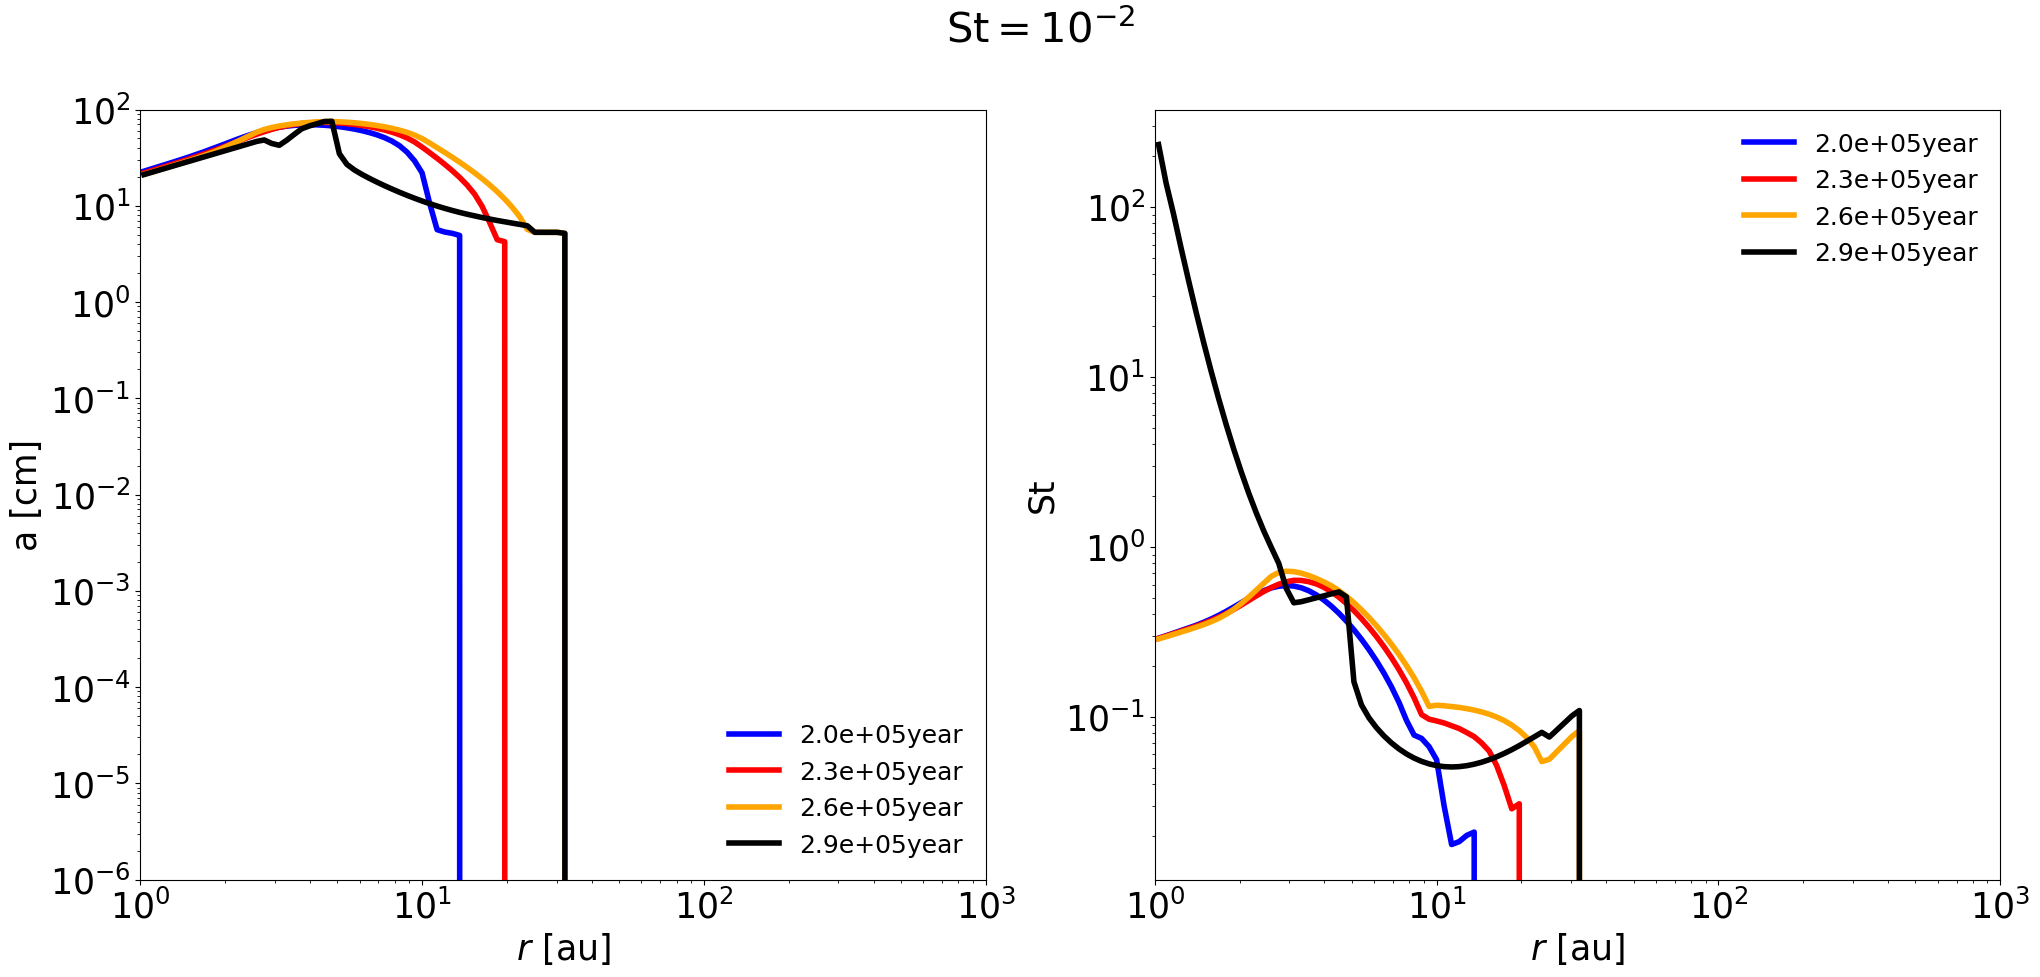

In [8]:
fig = plt.figure(figsize=(24, 10))
fig.suptitle(r"$\mathrm{St} = 10^{-2}$", fontsize=30)

ax1 = fig.add_subplot(1, 2, 1)
SQ = 6.9e4 * x**(-12/7)
lw = 4
ax1.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax1.set_ylabel(r"a [cm]", fontsize=fontsize)
ax1.plot(x, data1[ID_AD], label=time1, color="blue", lw=lw)
ax1.plot(x, data2[ID_AD], label=time2, color="red", lw=lw)
ax1.plot(x, data3[ID_AD], label=time3, color="orange", lw=lw)
ax1.plot(x, data4[ID_AD], label=time4, color="black", lw=lw)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim(1.0e-6, 1.0e2)
ax1.set_xlim(1.0e0, 1.0e3)
ax1.tick_params(labelsize=fontsize)
ax1.legend(fontsize=18, frameon=False, ncol=1, loc="lower right")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax2.set_ylabel(r"St", fontsize=fontsize)
ax2.plot(x, data1[ID_ST], label=time1, color="blue", lw=lw)
ax2.plot(x, data2[ID_ST], label=time2, color="red", lw=lw)
ax2.plot(x, data3[ID_ST], label=time3, color="orange", lw=lw)
ax2.plot(x, data4[ID_ST], label=time4, color="black", lw=lw)
ax2.set_xscale("log")
ax2.set_yscale("log")
# ax2.set_ylim(5.0e-5, 1.0)
ax2.set_xlim(1.0e0, 1.0e3)
ax2.tick_params(labelsize=fontsize)
ax2.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

plt.show()